<a href="https://colab.research.google.com/github/vishvpatel17/Task-3-Predict-Student-Performance/blob/main/Predict_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/student_performance_prediction.csv')

In [ ]:
df.shape

(40000, 7)

In [ ]:
df.head()


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB
None


In [ ]:
print(df.isnull().sum())

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64


In [ ]:
X = ['Study Hours per Week','Attendance Rate','Previous Grades']
y = ['Passed']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df[X],df[y],test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()

# Identify rows with NaN values in X_train_scaled
nan_rows_X = np.isnan(X_train_scaled).any(axis=1)

# Identify rows with NaN values in y_train
nan_rows_y = y_train.isnull().any(axis=1)

# Combine masks: filter out rows that have NaNs in EITHER X_train_scaled or y_train
combined_nan_mask = nan_rows_X | nan_rows_y.values # .values to handle DataFrame to array comparison

# Filter out rows with NaN values from X_train_scaled and y_train
X_train_cleaned = X_train_scaled[~combined_nan_mask]
y_train_cleaned = y_train[~combined_nan_mask]

model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

LogisticRegression()

In [ ]:
# Identify rows with NaN values in X_test_scaled
nan_rows_X_test = np.isnan(X_test_scaled).any(axis=1)

# Identify rows with NaN values in y_test
nan_rows_y_test = y_test.isnull().any(axis=1)

# Combine masks: filter out rows that have NaNs in EITHER X_test_scaled or y_test
combined_nan_mask_test = nan_rows_X_test | nan_rows_y_test.values

# Filter out rows with NaN values from X_test_scaled and y_test
X_test_cleaned = X_test_scaled[~combined_nan_mask_test]
y_test_cleaned = y_test[~combined_nan_mask_test]

y_pred = model.predict(X_test_cleaned)

In [ ]:
# Metrics
accuracy = accuracy_score(y_test_cleaned, y_pred)
print("\n--- Model Performance ---")
print(f"Accuracy Score: {accuracy:.4f}")


--- Model Performance ---
Accuracy Score: 0.5129


In [ ]:
# Get coefficients
coefficients = model.coef_[0]
feature_names = X

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n--- Feature Importance (Coefficients) ---")
print(coef_df)


--- Feature Importance (Coefficients) ---
                Feature  Coefficient
1       Attendance Rate     0.022739
0  Study Hours per Week    -0.011048
2       Previous Grades     0.003639


/tmp/ipython-input-150/955461949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=colors)


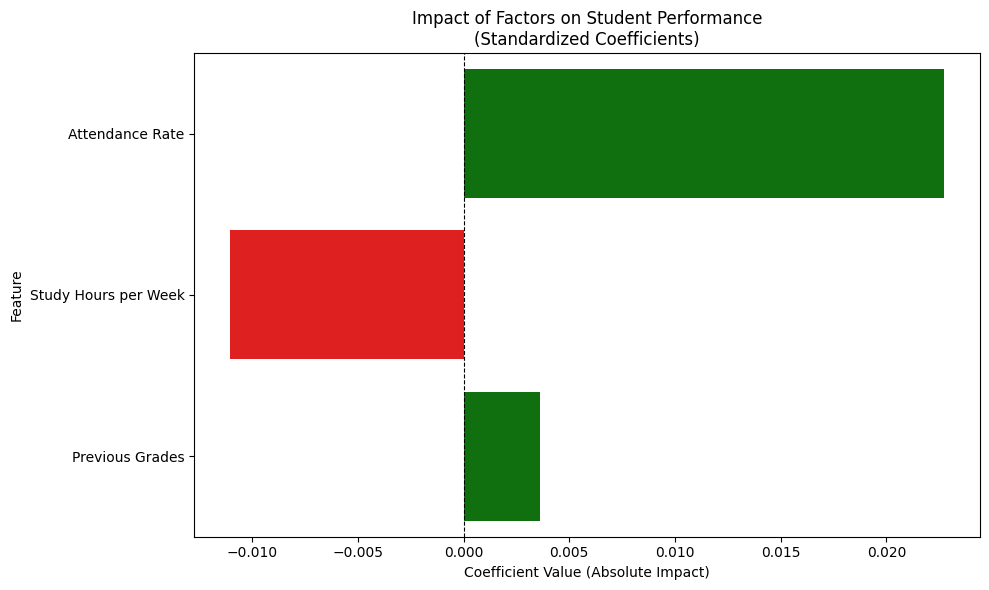

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=colors)
plt.title('Impact of Factors on Student Performance\n(Standardized Coefficients)')
plt.xlabel('Coefficient Value (Absolute Impact)')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()